In [4]:
library(dplyr)
library(tidyr)
library(lfe)
library(stringr)
library(ggplot2)
library(readr)

In [5]:
df <- read_rds('/pool001/mfzhao/PROCESSED_DATA/dyad_xgr.RDS')

In [6]:
colnames(df)

[1] "date"                "dyad"                "origin_cluster"     
 [4] "destination_cluster" "n"                   "bordering"          
 [7] "ndotd.uwr"           "log_ndotd.uwr"       "pdotd.uwr"          
[10] "log_pdotd.uwr"       "op1.uwr"             "op2.uwr"            
[13] "op3.uwr"             "dp1.uwr"             "dp2.uwr"            
[16] "dp3.uwr"             "op1:dp1.uwr"         "op1:dp2.uwr"        
[19] "op1:dp3.uwr"         "op2:dp1.uwr"         "op2:dp2.uwr"        
[22] "op2:dp3.uwr"         "op3:dp1.uwr"         "op3:dp2.uwr"        
[25] "op3:dp3.uwr"         "ndotd.wr"            "log_ndotd.wr"       
[28] "pdotd.wr"            "log_pdotd.wr"        "op1.wr"             
[31] "op2.wr"              "op3.wr"              "dp1.wr"             
[34] "dp2.wr"              "dp3.wr"              "op1:dp1.wr"         
[37] "op1:dp2.wr"          "op1:dp3.wr"          "op2:dp1.wr"         
[40] "op2:dp2.wr"          "op2:dp3.wr"          "op3:dp1.wr"         
[43] "op3:dp2.wr"          "op3:dp3.wr"

In [27]:
df %>% 
    filter(bordering == 1) -> brdr

In [9]:
fit <- felm(log(pdotd.wr) ~ 0 + op1.wr + op2.wr + op3.wr + dp1.wr + dp2.wr + dp3.wr
             | 0 | 0 | origin_cluster + destination_cluster, df, weights = df$n)
summary(fit)

Warning message in log(pdotd.wr):
“NaNs produced”



Call:
   felm(formula = log(pdotd.wr) ~ 0 + op1.wr + op2.wr + op3.wr +      dp1.wr + dp2.wr + dp3.wr | 0 | 0 | origin_cluster + destination_cluster,      data = df, weights = df$n) 

Weighted Residuals:
   Min     1Q Median     3Q    Max 
-48260  -7396  -4773  -2926   -249 

Coefficients:
       Estimate Cluster s.e. t value Pr(>|t|)
op1.wr  -0.2162       2.1808  -0.099    0.921
op2.wr  -0.8540       2.0825  -0.410    0.682
op3.wr  -0.1927       1.9549  -0.099    0.921
dp1.wr   0.3433       1.1231   0.306    0.760
dp2.wr   0.7416       1.5333   0.484    0.629
dp3.wr  -0.5865       1.2264  -0.478    0.633

Residual standard error: 7019 on 1994542 degrees of freedom
  (2240046 observations deleted due to missingness)
Multiple R-squared(full model): -35.36   Adjusted R-squared: -35.36 
Multiple R-squared(proj model): -35.36   Adjusted R-squared: -35.36 
F-statistic(full model, *iid*):-3.233e+05 on 6 and 1994542 DF, p-value: 1 
F-statistic(proj model): 0.1201 on 6 and 50 DF, p-value: 0.99

In [ ]:
fit <- felm(log(pdotd.wr) ~ op1.wr + op2.wr + op3.wr + dp1.wr + dp2.wr + dp3.wr
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)
summary(fit)

In [79]:
fit1 <- felm(log(pdotd.wr) ~ op1b + op2b + op3b + dp1b + dp2b + dp3b + op1nb + op2nb + op3nb + dp1nb + dp2nb + dp3nb
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)
fit2 <- felm(log(pdotd) ~ op1 + op2 + op3 + dp1 + dp2 + dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)

Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”


In [76]:
as.data.frame(summary(fit1)$coef) %>%
    mutate(var = rownames(.),
           type = ifelse(str_detect(var, 'nb$'), 'not bordering', 'bordering'),
           var = str_replace(var, 'n?b', '')) %>%
    rename(estimate = Estimate, se = `Cluster s.e.`) %>%
    bind_rows(as.data.frame(summary(fit2)$coef) %>%
              mutate(var = rownames(.),
                     type = 'all') %>%
              rename(estimate = Estimate, se = `Cluster s.e.`)) -> temp

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”


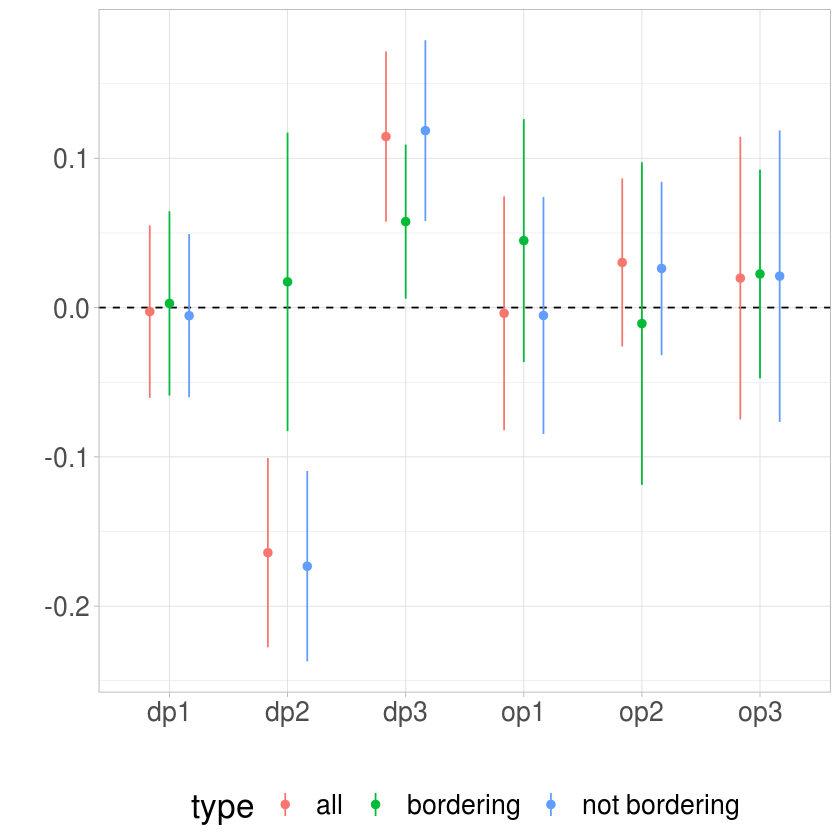

In [77]:
temp %>%
    ggplot(aes(x = var, y = estimate, color = type)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(0.5), size = 2) +
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), position = position_dodge(0.5), size = .5) +
    xlab('') + 
    ylab('') +
    labs(color = "type") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom')
    

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”


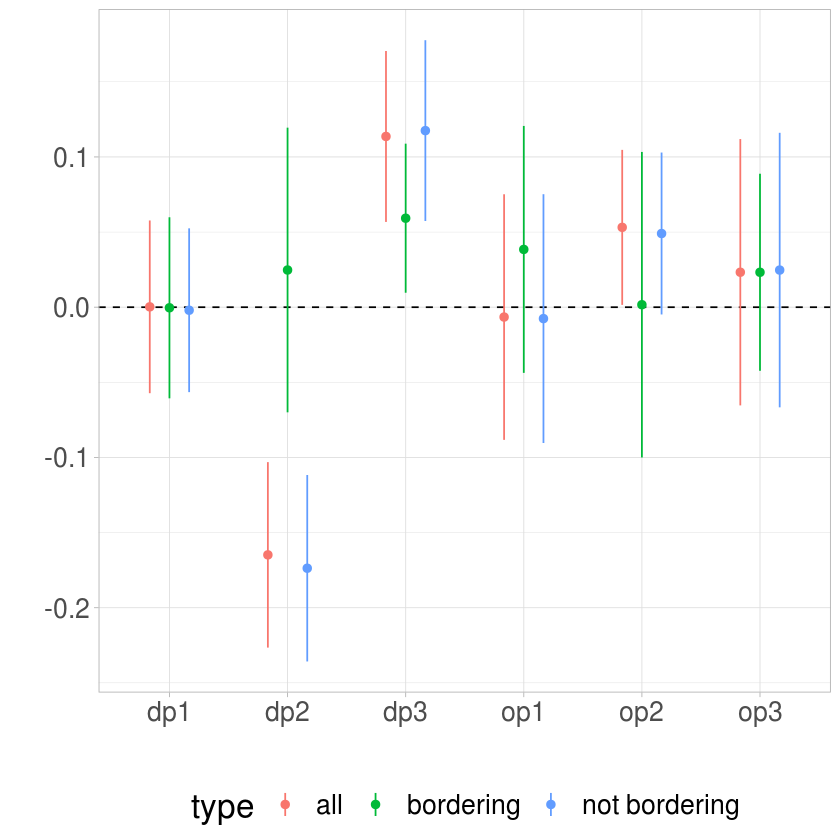

In [80]:
as.data.frame(summary(fit1)$coef) %>%
    mutate(var = rownames(.),
           type = ifelse(str_detect(var, 'nb$'), 'not bordering', 'bordering'),
           var = str_replace(var, 'n?b', '')) %>%
    rename(estimate = Estimate, se = `Cluster s.e.`) %>%
    bind_rows(as.data.frame(summary(fit2)$coef) %>%
              mutate(var = rownames(.),
                     type = 'all') %>%
              rename(estimate = Estimate, se = `Cluster s.e.`)) %>%
    ggplot(aes(x = var, y = estimate, color = type)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(0.5), size = 2) +
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), position = position_dodge(0.5), size = .5) +
    xlab('') + 
    ylab('') +
    labs(color = "type") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom')
    

In [29]:
fit1 <- felm(log(ndotd) ~ (op1 + op2 + op3 + dp1 + dp2 + dp3)
             | dyad + date | 0 | origin_cluster + destination_cluster, brdr)
summary(fit1)


Call:
   felm(formula = log(ndotd) ~ (op1 + op2 + op3 + dp1 + dp2 + dp3) |      dyad + date | 0 | origin_cluster + destination_cluster, data = brdr) 

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2044 -0.1414  0.0070  0.1499  3.8489 

Coefficients:
     Estimate Cluster s.e. t value Pr(>|t|)    
op1 -0.003758     0.013383  -0.281 0.780025    
op2 -0.060800     0.022894  -2.656 0.010647 *  
op3  0.025407     0.012837   1.979 0.053432 .  
dp1 -0.015875     0.012672  -1.253 0.216232    
dp2 -0.049590     0.025047  -1.980 0.053351 .  
dp3  0.046597     0.011882   3.922 0.000274 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2733 on 2314441 degrees of freedom
Multiple R-squared(full model): 0.9637   Adjusted R-squared: 0.9635 
Multiple R-squared(proj model): 0.008081   Adjusted R-squared: 0.00252 
F-statistic(full model, *iid*): 4742 on 12974 and 2314441 DF, p-value: < 2.2e-16 
F-statistic(proj model): 17.75 on 6 and 49 DF, p-va

In [ ]:
fit1 <- felm(log(pdotd) ~ op1 + op2 + op3 + dp1 + dp2 + dp3 + 
             op1:dp1 + op1:dp2 + op1:dp3 + 
             op2:dp1 + op2:dp2 + op2:dp3 + 
             op3:dp1 + op3:dp2 + op3:dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)
summary(fit1)

In [81]:
colnames(df)

[1] "date"                "dyad"                "origin_cluster"     
 [4] "destination_cluster" "n"                   "bordering"          
 [7] "ndotd"               "pdotd"               "oPRCP"              
[10] "oTMAX"               "dPRCP"               "dTMAX"              
[13] "op1"                 "op2"                 "op3"                
[16] "dp1"                 "dp2"                 "dp3"                
[19] "op1:dp1"             "op1:dp2"             "op1:dp3"            
[22] "op2:dp1"             "op2:dp2"             "op2:dp3"            
[25] "op3:dp1"             "op3:dp2"             "op3:dp3"            
[28] "op1b"                "op2b"                "op3b"               
[31] "dp1b"                "dp2b"                "dp3b"               
[34] "op1nb"               "op2nb"               "op3nb"              
[37] "dp1nb"               "dp2nb"               "dp3nb"